In [904]:
# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
 

# Machine Learning Imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split



In [905]:
df=pd.read_csv('/Users/xikaizhao/Desktop/Dataset/train_tan.csv')


In [906]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Prepareation 

Notice there are missing values in Age and Embarked. Let's fill empty values in Age column with median value. Fill the two missing values with the most occurred value, which is "S".

In [907]:
def harmonize_data(titanic):
    
    titanic["Age"] = titanic["Age"].fillna(titanic["Age"].median())
    titanic["Age"].median()
     

    titanic["Embarked"] = titanic["Embarked"].fillna("S")

    return titanic

In [908]:
df = harmonize_data(df)


Now let's take a look at all the different varibles and have a general sense about all varibles. 

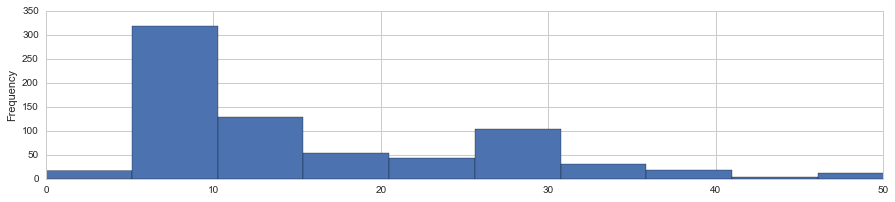

In [909]:
# Fare

data['Fare']=df['Fare'].astype(int)

# get fare for survived & didn't survive passengers 
fare_not_survived = df["Fare"][df["Survived"] == 0]
fare_survived     = df["Fare"][df["Survived"] == 1]

# plot
df['Fare'].plot(kind='hist', figsize=(15,3),bins=100, xlim=(0,50))


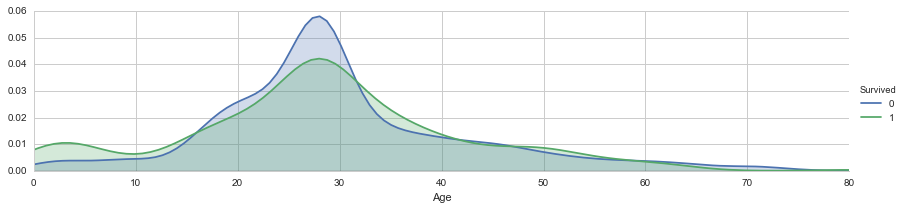

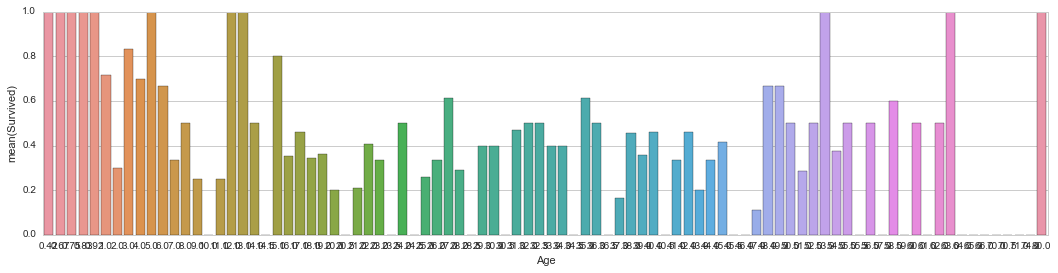

In [910]:
#Age


# peaks for survived/not survived passengers by their age
facet = sns.FacetGrid(df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, df['Age'].max()))
facet.add_legend()

fig, axis1 = plt.subplots(1,1,figsize=(18,4))
average_age = df[["Age", "Survived"]].groupby(['Age'],as_index=False).mean()
sns.barplot(x='Age', y='Survived', data=average_age)

It's pretty clear that people are less than 16 years old have a higher chance to survive, which matches to the famous "children and women" policy

In [911]:
# Sex

# We'll treat anyone as under 16 as a child, and then use the apply technique with a function to create a new column

# Revisit Lecture 45 for a refresher on how to do this.

# First let's make a function to sort through the sex 
def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex
    

# We'll define a new column called 'person', remember to specify axis=1 for columns and not index
df['person'] = df[['Age','Sex']].apply(male_female_child,axis=1)


In [912]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,28.0,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


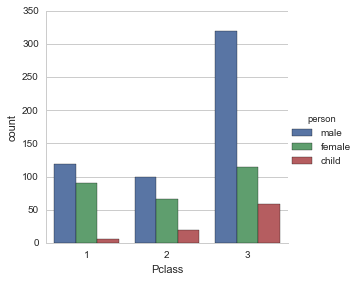

In [913]:
# Let's try the factorplot again!
sns.factorplot('Pclass',data=df,hue='person',kind="count")



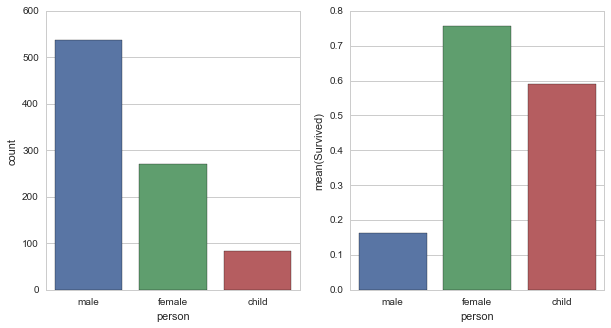

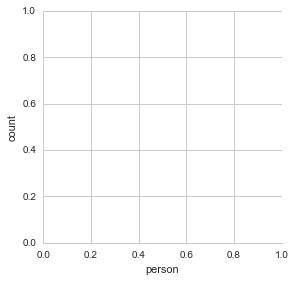

In [914]:

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(10,5))

sns.factorplot(x='person', data=df, ax=axis1, kind='count')


# average of survived for each Person(male, female, or child)
family_perc = df[["person", "Survived"]].groupby(['person'],as_index=False).mean()
sns.barplot(x='person', y='Survived', data=family_perc, ax=axis2, order=['male','female','child'])

 

Yup. Female and Children are more likely to survive. 

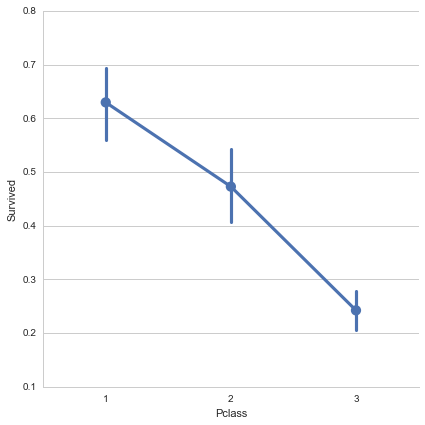

In [915]:
## Let's use a factor plot again, but now considering class
sns.factorplot('Pclass','Survived',data=df,size=6)


# Prediction with different methods  

In [916]:
sex_dummies=pd.get_dummies(df['person'])
embarked_dummies=pd.get_dummies(df["Embarked"])
class_dummies=pd.get_dummies(df["Pclass"])

In [917]:
sex_dummies.head()

,child,female,male
0,0.0,0.0,1.0
1,0.0,1.0,0.0
2,0.0,1.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [918]:
embarked_dummies.head()


,C,Q,S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [919]:
class_dummies.head()

,1,2,3
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0


In [920]:
survived=df.Survived

In [921]:
df=df.drop(['Sex','Name','Embarked','PassengerId','Ticket','Cabin','Survived','person','Pclass'],axis=1)

In [922]:
dummies=pd.concat([sex_dummies,embarked_dummies,class_dummies],axis=1)

In [923]:
df=pd.concat([df,dummies],axis=1)

In [924]:
df.head()

,Age,SibSp,Parch,Fare,child,female,male,C,Q,S,1,2,3
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [925]:
survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [926]:
df.head()

,Age,SibSp,Parch,Fare,child,female,male,C,Q,S,1,2,3
0,22.0,1,0,7.2500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,38.0,1,0,71.2833,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,26.0,0,0,7.9250,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,35.0,1,0,53.1000,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,35.0,0,0,8.0500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0


In [927]:
df.drop(['C',3,'female'], axis=1, inplace=True)

In [928]:
df.head()

,Age,SibSp,Parch,Fare,child,male,Q,S,1,2
0,22.0,1,0,7.2500,0.0,1.0,0.0,1.0,0.0,0.0
1,38.0,1,0,71.2833,0.0,0.0,0.0,0.0,1.0,0.0
2,26.0,0,0,7.9250,0.0,0.0,0.0,1.0,0.0,0.0
3,35.0,1,0,53.1000,0.0,0.0,0.0,1.0,1.0,0.0
4,35.0,0,0,8.0500,0.0,1.0,0.0,1.0,0.0,0.0


In [945]:
# Import SciKit Learn Log Reg
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# Create a Logistic Regression Class object
logreg = LogisticRegression()

X=df
Y=survived
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4,random_state=3)

# Train the model with the training set
logreg.fit(X_train, Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [969]:
#logistic Regression

# Import testing metrics from SciKit Learn
from sklearn import metrics

# Prediction from X_test
Y_pred = logreg.predict(X_test)

#Check accuracy
print metrics.accuracy_score(Y_test,Y_pred)

0.787114845938


In [970]:
#Import from SciKit Learn
from sklearn.neighbors import KNeighborsClassifier

# We'll first start with k=6

# Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors =3 )

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print metrics.accuracy_score(Y_test,Y_pred)

0.66106442577


In [971]:
### Import the kNeighbors Classifiers 
knn = KNeighborsClassifier(n_neighbors = 1)

# Fit the data
knn.fit(X_train,Y_train)

# Run a prediction
Y_pred = knn.predict(X_test)

# Check Accuracy against the Testing Set
print metrics.accuracy_score(Y_pred,Y_test)

0.683473389356


In [975]:
random_forest = RandomForestClassifier(n_estimators=600)

random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)

print metrics.accuracy_score(Y_pred,Y_test)

0.781512605042


In [976]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
print metrics.accuracy_score(Y_pred,Y_test)

0.703081232493


In [977]:
# get Correlation Coefficient for each feature using Logistic Regression
coeff_df = DataFrame(df.columns.delete(0))
coeff_df.columns = ['Features']
coeff_df["Coefficient Estimate"] = pd.Series(logreg.coef_[0])

# preview
coeff_df 


,Features,Coefficient Estimate
0,SibSp,-0.016551
1,Parch,-0.736905
2,Fare,-0.226244
3,child,0.010620
4,male,0.205271
5,Q,-2.954165
6,S,0.098790
7,1,-0.480682
8,2,1.812115
